In [25]:
import pandas as pd

In [26]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [27]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [28]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Question 3

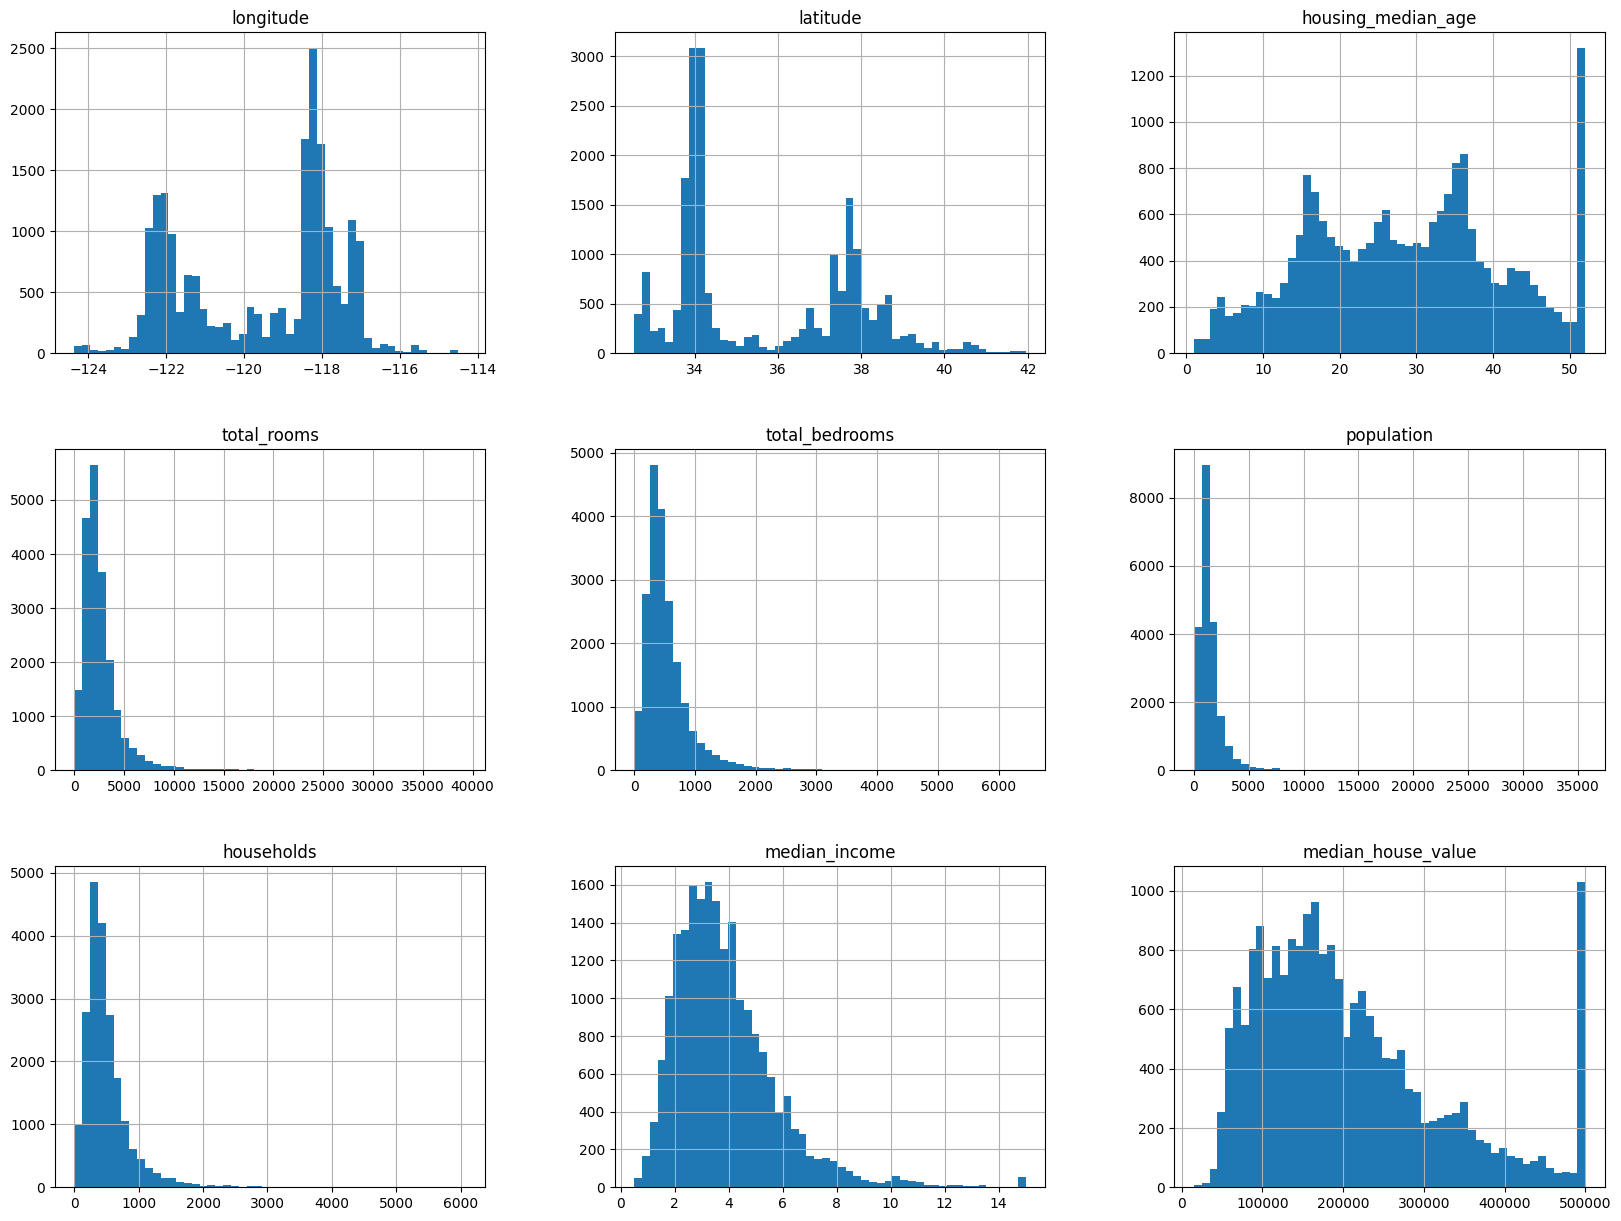

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Question 4

In [30]:
# to make this notebook's output identical and reproducible at every run, we need set seed
import numpy as np
np.random.seed(10)


In [31]:
# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [32]:
# run the function to get the train & test set
train_set, test_set = split_train_test(housing, 0.2)

In [33]:

train_samples = train_set.shape[0]  
test_samples = test_set.shape[0]    

print(f"Number of samples in train_set: {train_samples}")
print(f"Number of samples in test_set: {test_samples}")
print(f"Total samples: {train_samples + test_samples}")

total_samples = housing.shape[0]
print(f"Total samples in the housing dataset: {total_samples}")

assert train_samples + test_samples == total_samples, "The total samples do not match!"

Number of samples in train_set: 16512
Number of samples in test_set: 4128
Total samples: 20640
Total samples in the housing dataset: 20640


In [34]:
%pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [35]:

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=10)

In [36]:
train_set[train_set.isna().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
6814,-118.07,34.10,32.0,4275.0,NaN,2812.0,1012.0,3.3512,214100.0
4738,-118.38,34.05,49.0,702.0,NaN,458.0,187.0,4.8958,333600.0
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0
19833,-119.38,36.53,38.0,1281.0,NaN,1423.0,293.0,1.9602,51400.0
4852,-118.31,34.03,47.0,1315.0,NaN,785.0,245.0,1.2300,138400.0
...,...,...,...,...,...,...,...,...,...
11512,-118.10,33.74,32.0,2035.0,NaN,934.0,512.0,4.2287,500001.0
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,95800.0
13015,-121.19,38.71,11.0,4415.0,NaN,1520.0,627.0,3.2321,390800.0
10236,-117.92,33.87,33.0,1597.0,NaN,1888.0,423.0,3.0550,157800.0


In [37]:


train_set_clean = train_set.dropna(subset=["total_bedrooms"])
train_set_clean



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
12346,-116.52,33.82,21.0,10227.0,2315.0,3623.0,1734.0,2.5212,145200.0
19326,-122.94,38.50,46.0,2280.0,492.0,807.0,366.0,2.6316,117000.0
16824,-122.49,37.63,31.0,3109.0,621.0,1472.0,618.0,5.1550,263900.0
6869,-118.11,34.06,16.0,2416.0,565.0,1750.0,514.0,2.8229,163700.0
16677,-120.66,35.13,41.0,2666.0,751.0,940.0,507.0,1.9653,236100.0
...,...,...,...,...,...,...,...,...,...
9372,-122.53,37.93,37.0,1722.0,352.0,648.0,337.0,4.1250,310300.0
7291,-118.22,33.98,18.0,1781.0,765.0,1913.0,702.0,1.2059,255000.0
17728,-121.79,37.32,6.0,2850.0,561.0,2160.0,581.0,5.5336,241900.0
7293,-118.23,33.98,35.0,1366.0,496.0,2160.0,497.0,2.2059,150000.0


In [38]:
train_labels = train_set_clean["median_house_value"].copy() # get labels for output label Y
train_features = train_set_clean.drop("median_house_value", axis=1) # drop labels to get features X for training set



## Question 8

#### Task 1

In [39]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16346 entries, 12346 to 17673
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16346 non-null  float64
 1   latitude            16346 non-null  float64
 2   housing_median_age  16346 non-null  float64
 3   total_rooms         16346 non-null  float64
 4   total_bedrooms      16346 non-null  float64
 5   population          16346 non-null  float64
 6   households          16346 non-null  float64
 7   median_income       16346 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


#### Task 2 

In [40]:
print(f"Shape of train_features: {train_features.shape}")

print("Missing values in train_features:")
print(train_features.isnull().sum())

print("Statistics summary of train_features:")
print(train_features.describe())

Shape of train_features: (16346, 8)
Missing values in train_features:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64
Statistics summary of train_features:
          longitude      latitude  housing_median_age   total_rooms  \
count  16346.000000  16346.000000        16346.000000  16346.000000   
mean    -119.576731     35.639888           28.606265   2630.196745   
std        2.006389      2.139648           12.632219   2158.731496   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1451.000000   
50%     -118.500000     34.260000           29.000000   2125.500000   
75%     -118.010000     37.720000           37.000000   3137.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    househol

12346    145200.0
19326    117000.0
16824    263900.0
6869     163700.0
16677    236100.0
Name: median_house_value, dtype: float64


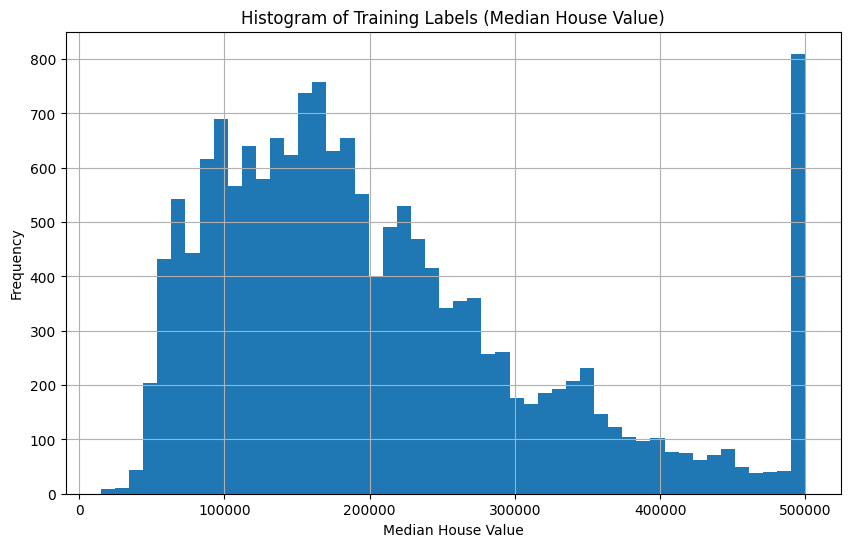

In [41]:
print(train_labels.head())

import matplotlib.pyplot as plt

train_labels.hist(bins=50, figsize=(10, 6))
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Histogram of Training Labels (Median House Value)")
plt.show()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>, <Axes: >]],
      dtype=object)

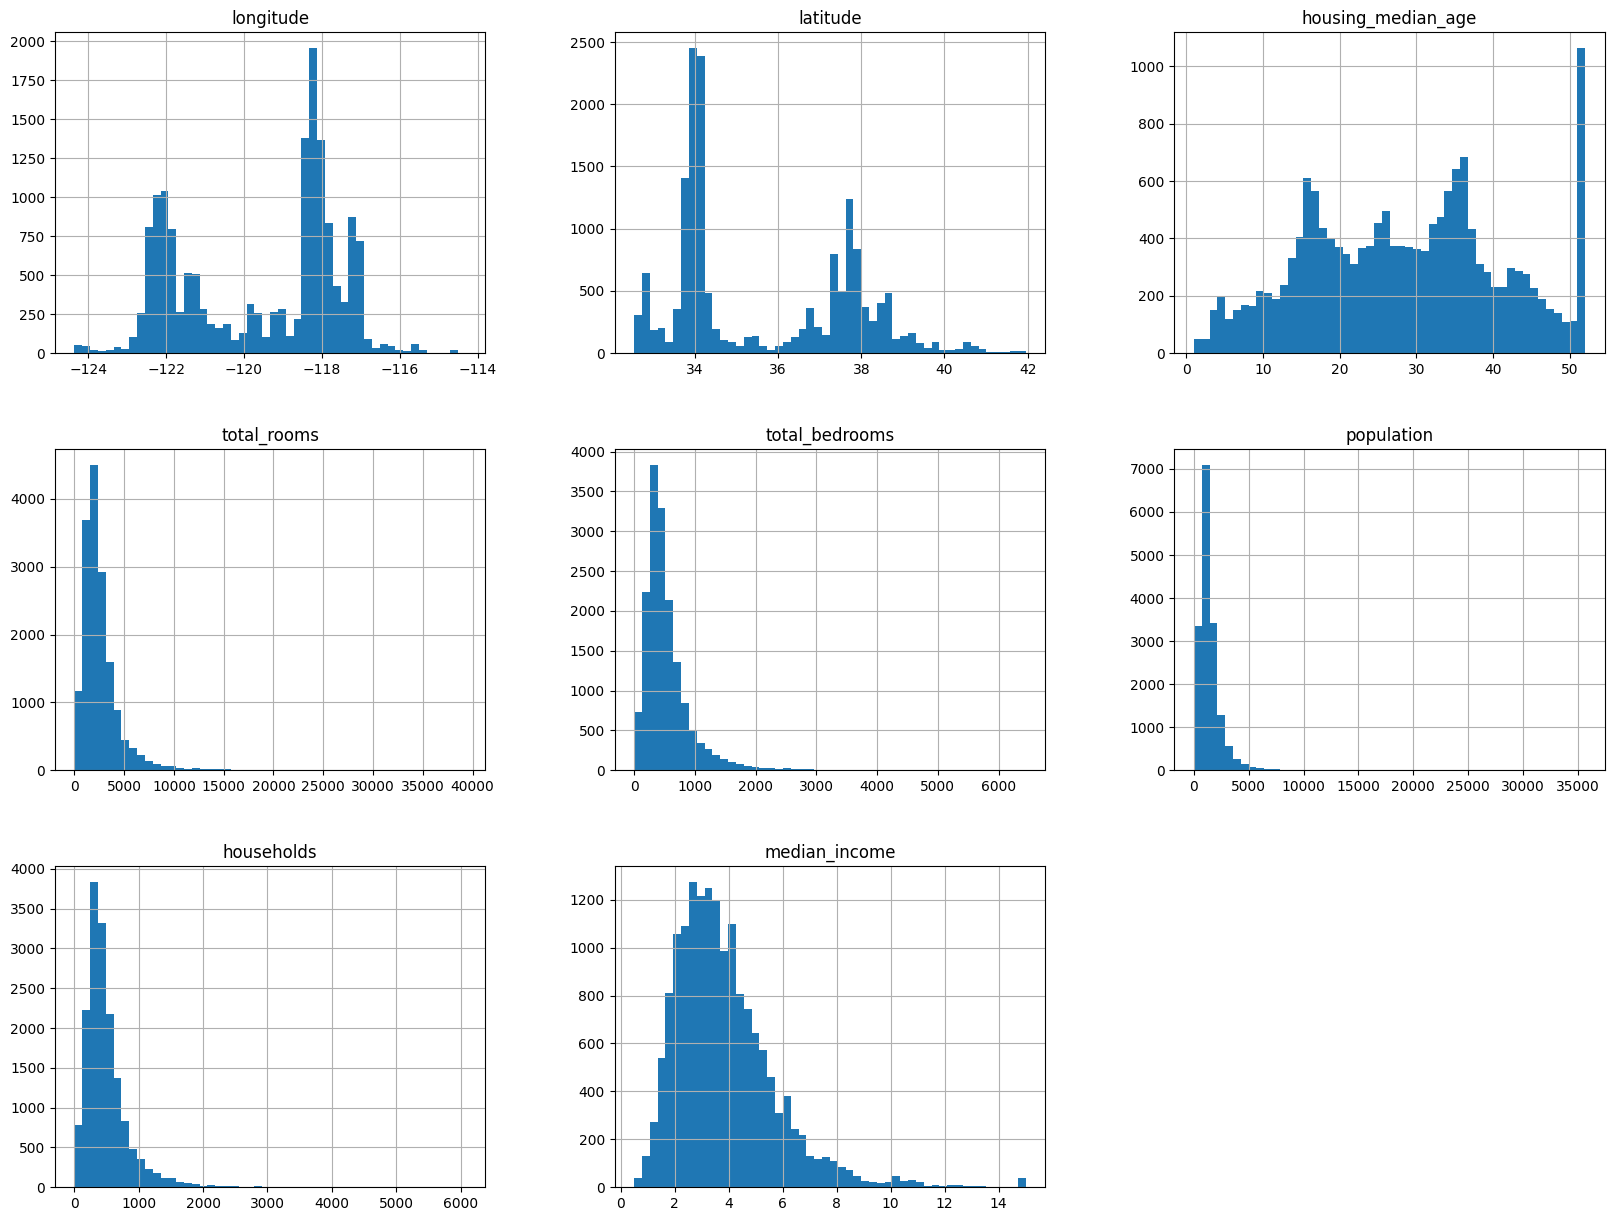

In [42]:
train_features.hist(bins=50, figsize=(20,15))

In [43]:
train_features.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000
mean,-119.576731,35.639888,28.606265,2630.196745,537.625413,1425.149456,498.992659,3.864135
std,2.006389,2.139648,12.632219,2158.731496,418.511077,1136.460782,378.999712,1.892231
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1451.000000,296.000000,785.000000,279.000000,2.559275
50%,-118.500000,34.260000,29.000000,2125.500000,435.000000,1165.500000,409.000000,3.533800
75%,-118.010000,37.720000,37.000000,3137.000000,647.000000,1728.000000,605.000000,4.739900
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() ## define the transformer
scaler.fit(train_features) ## call .fit() method to calculate the min and max value for each column in datas

MinMaxScaler()

In [45]:
print("Min of each column: ",scaler.data_min_)
print("Max of each column: ",scaler.data_max_)

Min of each column:  [-124.35     32.54      1.        2.        1.        3.        1.
    0.4999]
Max of each column:  [-1.14310e+02  4.19500e+01  5.20000e+01  3.93200e+04  6.44500e+03
  3.56820e+04  6.08200e+03  1.50001e+01]


In [46]:


train_features_normalized = scaler.transform(train_features)
train_features_normalized



array([[0.77988048, 0.1360255 , 0.39215686, ..., 0.10146024, 0.28498602,
        0.13939808],
       [0.14043825, 0.63336876, 0.88235294, ..., 0.02253426, 0.06002302,
        0.14701177],
       [0.18525896, 0.54091392, 0.58823529, ..., 0.04117268, 0.10146358,
        0.32103695],
       ...,
       [0.25498008, 0.50797024, 0.09803922, ..., 0.06045573, 0.09537905,
        0.34714694],
       [0.60956175, 0.15302869, 0.66666667, ..., 0.06045573, 0.08156553,
        0.11765355],
       [0.24601594, 0.50584485, 0.29411765, ..., 0.04683427, 0.11182371,
        0.15009448]])

## Question 9

#### Task 1

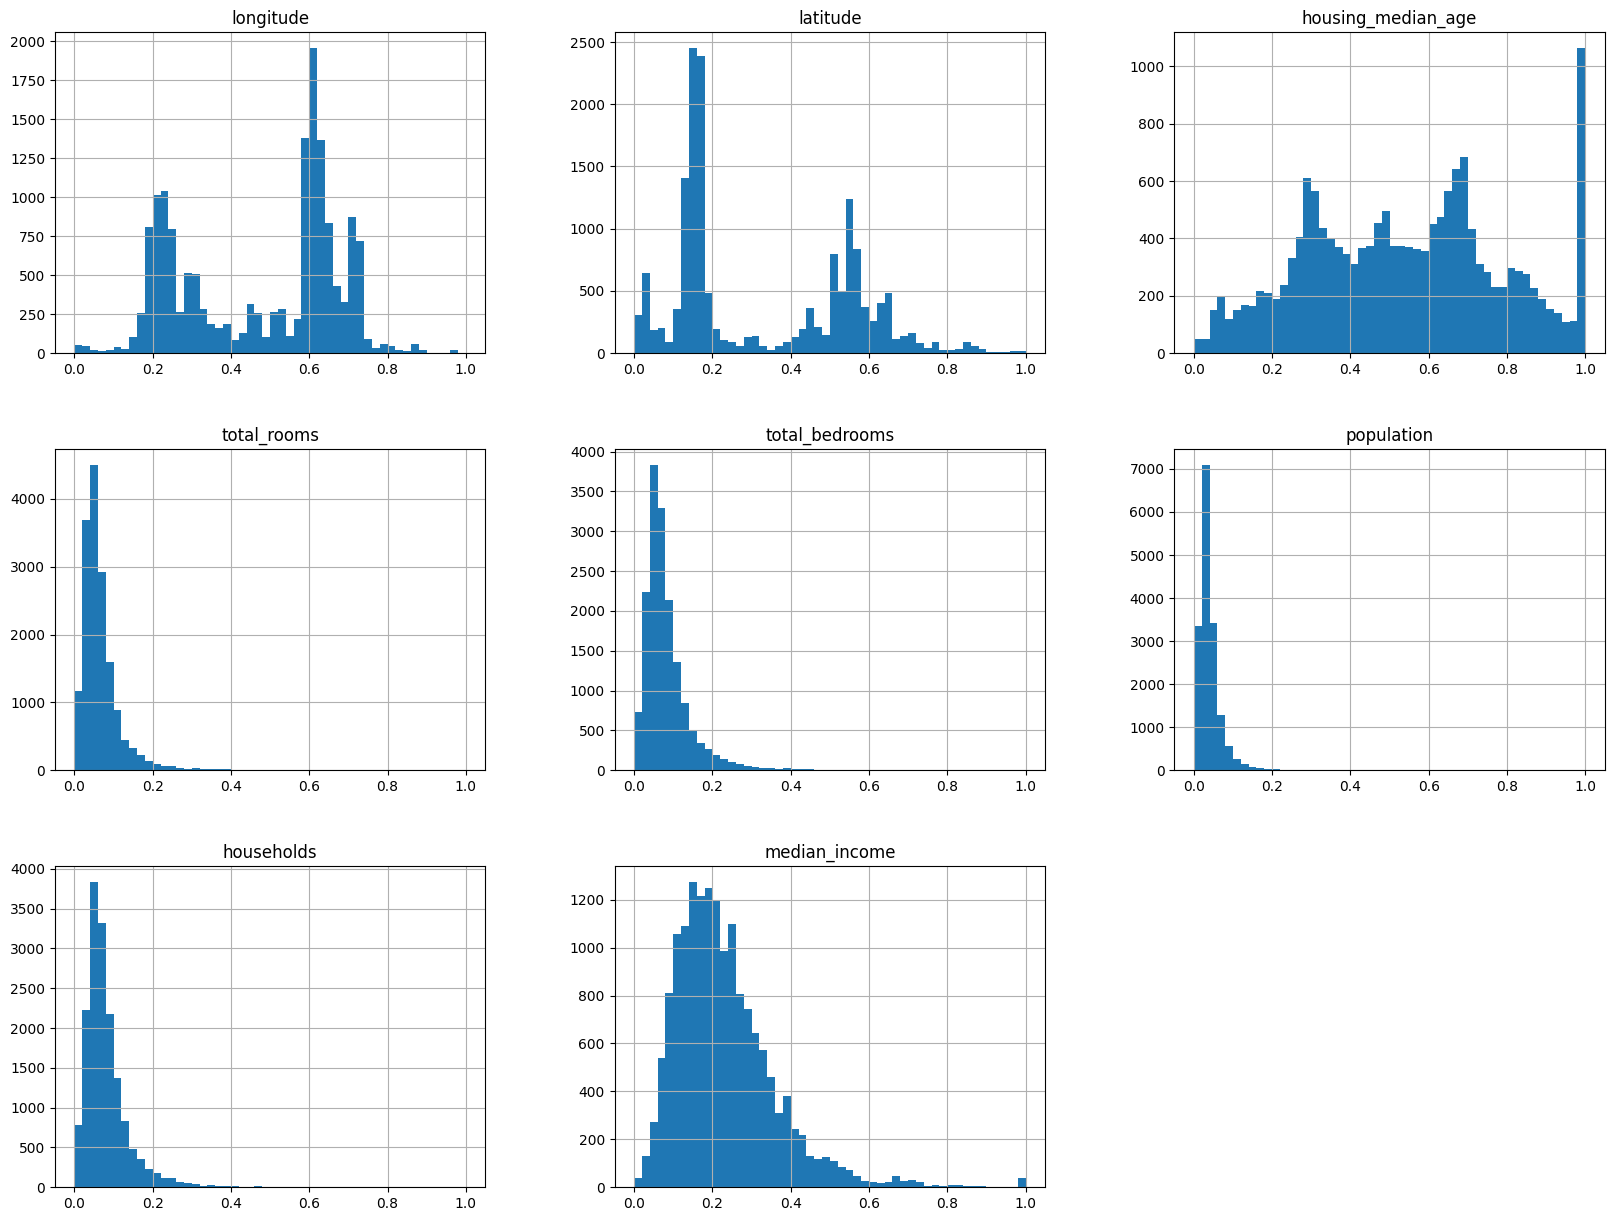

In [48]:
# Assuming train_features_normalized is your normalized dataset

import matplotlib.pyplot as plt
import pandas as pd

# Convert the normalized NumPy array back to a DataFrame for plotting
normalized_df = pd.DataFrame(train_features_normalized, columns=train_features.columns)

# Plot histograms for each normalized feature
normalized_df.hist(bins=50, figsize=(20, 15))
plt.show()